<a href="https://colab.research.google.com/github/AbiramiMuthu/AbiramiMuthu/blob/main/Tensorflow_CNN_CancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv1D,MaxPool1D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn import datasets,metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load the Dataset from sklearn

In [ ]:
cancer_dataset = datasets.load_breast_cancer()


In [ ]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Convert the dataset to DataFrame

In [ ]:
X=pd.DataFrame(data=cancer_dataset.data,columns=cancer_dataset.feature_names)

In [ ]:
Y=cancer_dataset.target

In [ ]:
X.shape

(569, 30)

In [ ]:
Y.shape

(569,)

## Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
Y_train.shape

(455,)

In [ ]:
X_test.shape

(114, 30)

## Data Standardisation

In [ ]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

## Reshaping 2D to 3D

In [ ]:
X_train=X_train.reshape(455,30,1)
X_test=X_test.reshape(114,30,1)

In [ ]:
X_train.shape

(455, 30, 1)

## Buid Model

In [ ]:
model=Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(filters=364,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

## Train the Model

In [ ]:
history=model.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50
15/15 [==============================] - 2s 43ms/step - loss: 0.3961 - accuracy: 0.9033 - val_loss: 0.3060 - val_accuracy: 0.9649
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0870 - accuracy: 0.9736 - val_loss: 0.2772 - val_accuracy: 0.9211
Epoch 3/50
15/15 [==============================] - 0s 26ms/step - loss: 0.1573 - accuracy: 0.9604 - val_loss: 0.2892 - val_accuracy: 0.8947
Epoch 4/50
15/15 [==============================] - 0s 25ms/step - loss: 0.1698 - accuracy: 0.9451 - val_loss: 0.2671 - val_accuracy: 0.8860
Epoch 5/50
15/15 [==============================] - 0s 25ms/step - loss: 0.1554 - accuracy: 0.9714 - val_loss: 0.2744 - val_accuracy: 0.8684
Epoch 6/50
15/15 [==============================] - 0s 24ms/step - loss: 0.2385 - accuracy: 0.9626 - val_loss: 0.2647 - val_accuracy: 0.8860
Epoch 7/50
15/15 [==============================] - 0s 26ms/step - loss: 0.0543 - accuracy: 0.9846 - val_loss: 0.2644 - val_accuracy: 0.8947
Epoch 8/50
15

## Plotting

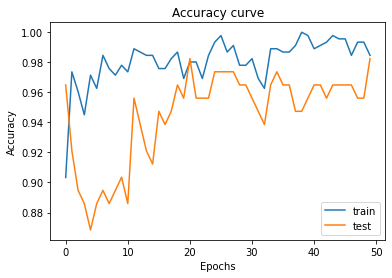

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.legend(['train','test'])
plt.show()

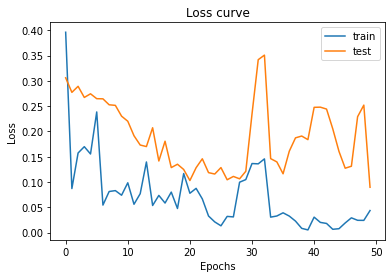

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.legend(['train','test'])
plt.show()